In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv

In [2]:
df = pd.read_csv("2017_jun_final.csv")

Прочитайте отриману таблицю, використовуючи метод head

In [3]:
df.head(4)

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV


Визначте розмір таблиці за допомогою методу shape

In [4]:
df.shape

(8704, 25)

Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [5]:
df.dtypes

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [6]:
df.isnull().sum()

N                                      0
Должность                              0
Язык.программирования               3850
Специализация                       7219
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Университет                          358
Еще.студент                            0
Уровень.английского                    0
Предметная.область                   223
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls             

Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"

In [7]:
df.drop(["Специализация", "Университет", "Предметная.область", "Валюта", "cls"], axis=1, inplace=True)

Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"

In [8]:
df.isnull().sum()

N                                      0
Должность                              0
Язык.программирования               3850
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Еще.студент                            0
Уровень.английского                    0
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64

Видаліть усі рядки у вихідній таблиці за допомогою методу dropna

In [9]:
df = df.dropna()

Визначте новий розмір таблиці за допомогою методу shape

In [10]:
df.shape

(4854, 20)

Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python

In [13]:
df = df.rename(columns={"Должность": "position", "Язык.программирования": "programming_language",
                        "Общий.опыт.работы": "general_work_experience", "Опыт.работы.на.текущем.месте": "work_experience_at_the_current_location",
                        "Зарплата.в.месяц": "salary_per_month", "Изменение.зарплаты.за.12.месяцев": "salary_change_for_12_months",
                        "Город": "city", "Размер.компании": "company_size", "Тип.компании": "company_type",
                        "Пол": "male", "Возраст": "age", "Образование": "education", "Еще.студент": "student_now",
                        "Уровень.английского": "english_level", "Дата.заполнения": "date_of_completion", "User.Agent": "user_agent"})



In [14]:
python_data = df.query('programming_language == "Python"')

Визначте розмір таблиці python_data за допомогою методу shape

In [15]:
python_data.shape

(207, 20)

Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"

In [16]:
grp = python_data.groupby(["position"])

Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"

In [17]:
df_grp = grp["salary_per_month"].agg(["min", "max"])
df_grp

,min,max
position,,
Junior Software Engineer,100,1250
Senior Software Engineer,1300,9200
Software Engineer,500,5400
System Architect,3000,5000
Technical Lead,1425,6200


Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"

In [18]:
def fill_avg_salary(data):
    return (data["min"]+data["max"])/2

avg = df_grp.apply(fill_avg_salary, axis=1, result_type='expand')
avg.name = "avg"
df_grp = pd.concat([df_grp, avg], axis=1)
df_grp

,min,max,avg
position,,,
Junior Software Engineer,100,1250,675.0
Senior Software Engineer,1300,9200,5250.0
Software Engineer,500,5400,2950.0
System Architect,3000,5000,4000.0
Technical Lead,1425,6200,3812.5


Створіть описову статистику за допомогою методу describe для нового стовпчика

In [19]:
df_grp["avg"].describe()

count       5.000000
mean     3337.500000
std      1700.091909
min       675.000000
25%      2950.000000
50%      3812.500000
75%      4000.000000
max      5250.000000
Name: avg, dtype: float64

Збережіть отриману таблицю в CSV файл

In [24]:
df.to_csv("2017_jun_2022.csv")

In [20]:
df_grp.to_csv("2017_jun_new.csv")

ВІЗУАЛІЗАЦІЯ

In [21]:
df.head(4)

,N,position,programming_language,general_work_experience,work_experience_at_the_current_location,salary_per_month,salary_change_for_12_months,city,company_size,company_type,male,age,education,student_now,english_level,date_of_completion,user_agent,exp,current_job_exp,salary
2,3,Software Engineer,C#/.NET,4,1,2500,800,Киев,до 1000 человек,Аутсорсинговая,мужской,26,Высшее,False,средний,12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500
3,4,Software Engineer,JavaScript,5,4,2000,400,Одесса,до 200 человек,Продуктовая,мужской,30,Среднее,False,ниже среднего,12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
4,5,Senior Software Engineer,JavaScript,10 и более лет,0.5,4500,500,Другой,до 10 человек,Продуктовая,мужской,30,Техникум / Колледж,False,средний,12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500
6,7,Junior Software Engineer,C#/.NET,1,меньше 3 месяцев,600,100,Хмельницкий,до 50 человек,Аутсорсинговая,мужской,23,Высшее,False,ниже среднего,12/06/2017 13:04:26,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.0,0.0,600


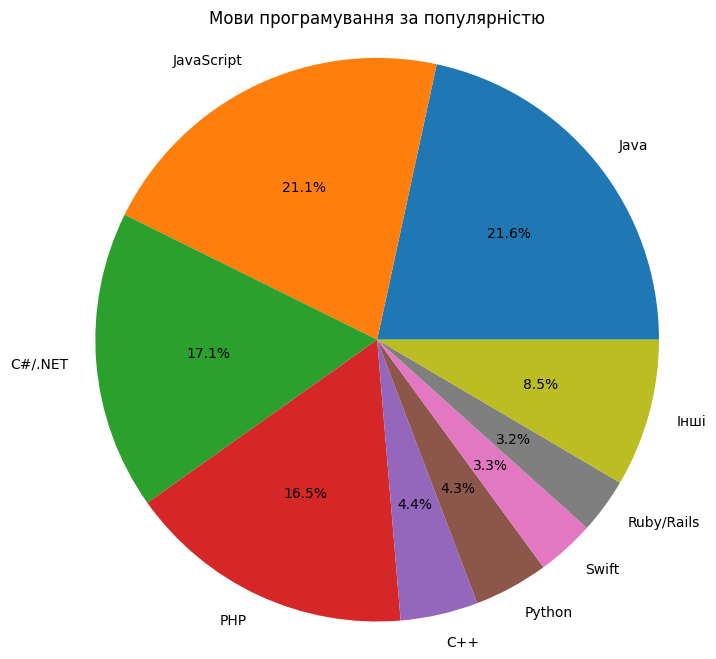

In [30]:
languages = df['programming_language'].value_counts(normalize=True)

other_languages = languages[languages < 0.02].sum()
languages = languages[languages >= 0.02]
languages['Інші'] = other_languages

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(languages.values, labels=languages.index, autopct='%1.1f%%')
ax.axis('equal')
plt.title('Мови програмування за популярністю')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_7996\3050143539.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grouped['programming_language'], rotation=45, ha='right')


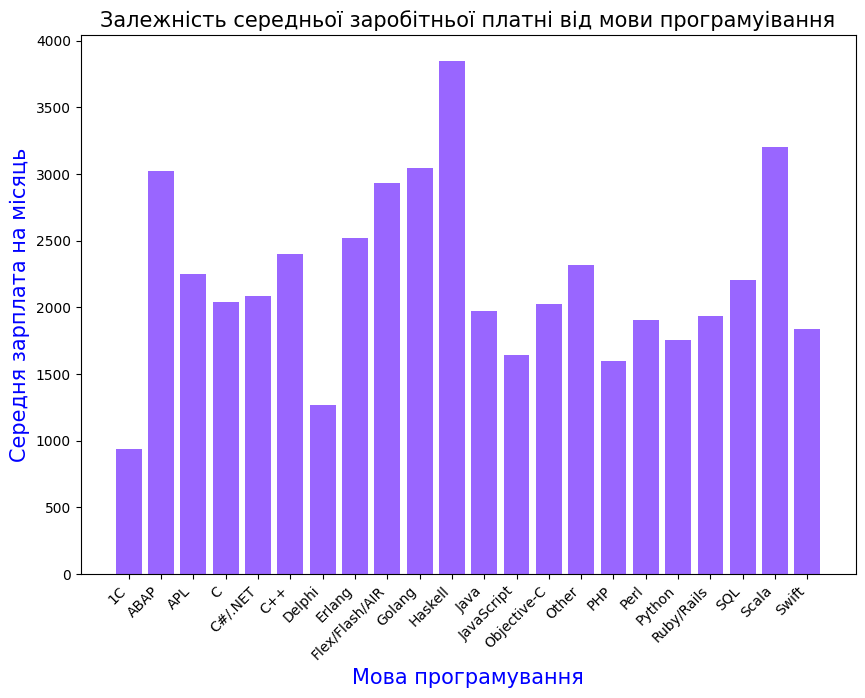

In [36]:
grouped = df.groupby('programming_language')['salary_per_month'].mean().reset_index()
fig, ax = plt.subplots(figsize=(10, 7))

# Побудова графіку
ax.bar(grouped['programming_language'], grouped['salary_per_month'], color='#9966FF')

# Налаштування вісі X
ax.set_xlabel('Мова програмування', fontsize=15, color='blue')
ax.set_xticklabels(grouped['programming_language'], rotation=45, ha='right')

# Налаштування вісі Y
ax.set_ylabel('Середня зарплата на місяць', fontsize=15, color='blue')

# Налаштування заголовку графіку
ax.set_title('Залежність середньої заробітньої платні від мови програмуівання', fontsize=15)
plt.show()

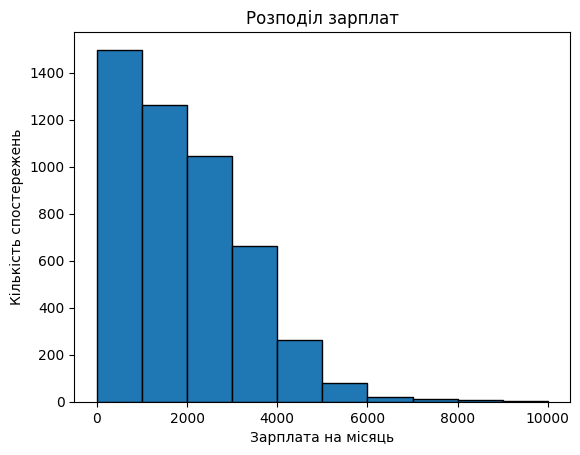

In [41]:
# Визначення інтервалів зарплат
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

# Побудова гістограми
plt.hist(df['salary_per_month'], bins=bins, edgecolor='black')

# Додавання міток осей
plt.xlabel('Зарплата на місяць')
plt.ylabel('Кількість спостережень')

# Додавання заголовку
plt.title('Розподіл зарплат')

# Відображення графіка
plt.show()